<a href="https://colab.research.google.com/github/valogonor/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
X = df.drop(['price'], axis=1)
y = df.price

## 1.2 Split the data into test and train datasets using train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)

print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
X_train.head()

(8495, 8)
(6371, 8)
(2124, 8)
(6371,)
(2124,)


,make,body,mileage,engV,engType,registration,year,drive
3094,76,0,100,1.6,3,1,1992,1
110,42,0,50,3.5,0,1,2008,1
3213,76,1,188,1.3,3,1,1993,0
7150,14,5,350,10.0,1,1,2002,0
1079,50,2,71,5.5,3,1,2007,2


## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [14]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [15]:
print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [  -33.80914554 -1721.02501098   -39.96352172   272.10204943
 -1085.33344434  4487.51810936  1145.2506681   8462.04541339]

 Intercept:  -2278702.1490454697


## 1.5 Use the test data to make predictions

In [17]:
y_test_predict = model.predict(X_test)
y_test_predict

array([19194.45968216,  5367.93233327, 26151.89784368, ...,
       21790.01574206, 11486.29535553,  8099.62613193])

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [18]:
MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(Y_test, y_test_predict)

print('R^2 is {}'.format(R2))

MSE is 413668554.17032874
RMSE is 20338.843481632106
R^2 is 0.30479352255023595


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

For every year the year goes up, the price increases by $1145.25.

## 1.8 How should we interpret the Root-Mean-Square Error?

A residual or error is the difference between each prediction and the actual value. MSE is the square of the sum of these residuals, and the RMSE is the square root of the MSE. The RMSE measures the total amount that our predictions were off from the actual value. In this case, the RMSE of 20,339 means that our predictions for the observations we tested were off by a total of $20,339.

## 1.9 How should we interpret the $R^2$?

The R-squared of .3048 indicates that about 30.5% of the price is explained by our x variables.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [19]:
df['ln_price'] = np.log(df['price'])
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

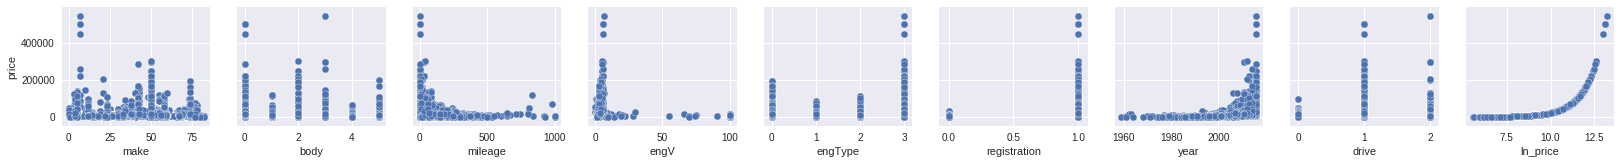

In [28]:
# Generate a list of column headers not including price
x_columns = df.columns.drop('price')

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data=df, y_vars=['price'], x_vars=x_columns);

It looks like the graph of price with year would have a curve for its regression, so "year" may be a good candidate to use to create a ploynomial feature.

## 2.3 If appropriate, create any polynomial features. 

In [57]:
df['year_squared'] = df.year**2
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price,year_squared
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595,4040100
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180,4044121
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103,4032064
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954,4048144
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158,4052169


## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [58]:
X = df.drop(['price', 'ln_price'], axis=1)
y = df.ln_price
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [-1.58780120e-03 -9.04554791e-02  6.84115159e-04  8.38817792e-03
 -4.88819193e-02  6.68632563e-01 -6.09456487e+00  3.79037603e-01
  1.54762612e-03]

 Intercept:  6006.438928717487


In [59]:
y_test_predict = model.predict(X_test)

MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))
R2 = r2_score(Y_test, y_test_predict)
print('R^2 is {}'.format(R2))

MSE is 0.3137848186051343
RMSE is 0.5601649923059583
R^2 is 0.6673391393278472


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

The coefficient of -6.09 on "year" means that for every year the year goes up, the price decreases by about $6.09.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient descent seeks to minimize a function. For example, gradient descent can be used to find the values of the slope and intercept of a line that minimizes the errors in a dataset. It is another way of finding the regression line--the line of best fit.

## 3.2 What is the "Learning Rate" and what is its function?

The learning rate is the size of the steps we take toward the optimal solution. It determines how quickly or slowly we get to the optimal solution. The learning rate is critical because if it is set too high, it will skip the optimal solution, and if it is set to low, it will take too many iterations to get to the optimal solution.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [60]:
# This is like using np.ones to add a vector of ones
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1870.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:29:57   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6418.6476    624.441     10.279   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [47]:
print(X.columns, '\n\n')

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'year_squared'],
      dtype='object') 


[2953273039.000897, 1.060431475161977, 1.1583527741914774, 1.9368892032947695, 1.0100376419582973, 1.1547598212322845, 1.1085146982201888, 141693.16571434424, 1.1396338223459779, 141937.91485709895]


Yes, we have multicollinearity problems on the year and year_squared variables. Multicollinearity problems are indicated when the VIF of the variables is greater than 10. The VIFs on year and year_squared are way greater than 10.